# Part 1 of the Machine Learning Project

> Version 2022-10-10

**To be completed and submitted on Moodle by 26/10/2022**. Run your code and save/export your notebook in `.ipynb`, and upload it to Moodle.

Part 2 will be sent after, so this is an hard deadline. Part 2 contains the correction of part 1 and additional questions.

- Part 1 counts for 50 points
- Part 2 counts for 50 points

## Preliminaries


Before satring familiarize yourself with pandas reading the “10 minutes to pandas” tutorial: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

Browse through the full pandas user guide when needed: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html


## Load libraries

In [55]:
!pip install gdown   # inspired from here > https://safjan.com/download-data-google-drive-colab-gdown/

# In the all following sections, I have tried to clean the dataset step by step.

In [56]:
# for data manipulation
import numpy as np
import pandas as pd

# file system manangement
import os

import matplotlib.pyplot as plt
import seaborn as sns
import gdown

<p><img alt="Datasets" src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png" align="left" hspace="10px" vspace="0px"></p>


<h1>Datasets</h1>

In [57]:
file_id1 = "1TNRRGlws5vWKEum8v1PQrVq8PGacMT9Y"   # Replace this with your file's ID
src_train = "application_train.csv.zip"          # Replace "data_file.ext" with the desired output filename and extension
gdown.download(f"https://drive.google.com/uc?id={file_id1}", src_train)

file_id2 = "1IEUuu-Czdv2gsE8Q0EUtGvUelh2xUwN8"  # Replace this with your file's ID
src_test = "application_test.csv.zip"           # Replace "data_file.ext" with the desired output filename and extension
gdown.download(f"https://drive.google.com/uc?id={file_id2}", src_test)

file_id3 = "15PuV3DpXii2FokryWCyxTS4HGUj4Kbmn"  # Replace this with your file's ID
src_previous = "previous_application.csv.zip"   # Replace "data_file.ext" with the desired output filename and extension
gdown.download(f"https://drive.google.com/uc?id={file_id3}", src_previous)

file_id4 = "18ycqN4m4zmoLvZHWIvYzF9SZiErAPeTi"  # Replace this with your file's ID
src_bureau = "bureau.csv.zip"                   # Replace "data_file.ext" with the desired output filename and extension
gdown.download(f"https://drive.google.com/uc?id={file_id4}", src_bureau)

Downloading...
From: https://drive.google.com/uc?id=1TNRRGlws5vWKEum8v1PQrVq8PGacMT9Y
To: /content/application_train.csv.zip
100%|██████████| 37.8M/37.8M [00:00<00:00, 68.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IEUuu-Czdv2gsE8Q0EUtGvUelh2xUwN8
To: /content/application_test.csv.zip
100%|██████████| 6.09M/6.09M [00:00<00:00, 97.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=15PuV3DpXii2FokryWCyxTS4HGUj4Kbmn
To: /content/previous_application.csv.zip
100%|██████████| 80.0M/80.0M [00:01<00:00, 54.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=18ycqN4m4zmoLvZHWIvYzF9SZiErAPeTi
To: /content/bureau.csv.zip
100%|██████████| 38.6M/38.6M [00:00<00:00, 52.8MB/s]


'bureau.csv.zip'

# New Section

<h1>Loading the datasets (2 pts)</h1>

1. Similarly to the train set, load the test set, the bureau dataset and the past applications dataset.

2. Display for each the number of rows and the number of columns

*You will be evaluated as follow*
* 1: Correct approach + code: 1pt
* 2: Code: 1pts


In [58]:
#Your code here

# The variables that should be implemented to store the data are: app_train, app_test, bureau, app_past
# 1 - Loading the different datasets.
app_train = pd.read_csv(src_train , compression="zip")    # train set
app_test = pd.read_csv(src_test , compression="zip")      # test set
bureau = pd.read_csv(src_bureau , compression="zip")      # bureau dataset
app_past = pd.read_csv(src_previous , compression="zip")  # past applications dataset

# 2 - number of rows and columns for each dataset
print("FOR app_train", '\n',"number of rows : ", app_train.shape[0])     # obtaining the number of rows
print("number of columns : ", app_train.shape[1], '\n')                  # obtaining the number of columns

print("FOR app_test", '\n', "number of rows : ", app_test.shape[0])       # obtaining the number of rows
print("number of columns : ", app_test.shape[1], '\n')                   # obtaining the number of columns

print("FOR bureau", '\n', "number of rows : ", bureau.shape[0])          # obtaining the number of rows
print("number of columns : ", bureau.shape[1], '\n')                     # obtaining the number of columns

print("FOR app_past", '\n', "number of rows : ", app_past.shape[0])      # obtaining the number of rows
print("number of columns : ", app_past.shape[1], '\n')                   # obtaining the number of columns

FOR app_train 
 number of rows :  307511
number of columns :  122 

FOR app_test 
 number of rows :  48744
number of columns :  121 

FOR bureau 
 number of rows :  1716428
number of columns :  17 

FOR app_past 
 number of rows :  1670214
number of columns :  37 



In [59]:
app_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


<h1> Feature Engineering</h1>

<h2>Missing values (9pts)</h2>


**3.a**: What columns are missing the most values in app_test?

**3.b**: What columns are missing the most values in bureau?

**3.c**: What columns are missing the most values in app_past?

4: Fix missing data in app_test dataset using categorization and/or simple imputation when appropriate. Be careful to the **data leakage** issue!

*You will be evaluated as follow*
* 3: Correct approach + code 2pts.
* 4: Description of the approach 4pts. Code implementation of the approach 3pts.

In [60]:
# 3.a - 3.b - 3.c
app_test.count()                                # to count number of non "NAN" values in each column of the dataset
most_NAN_app_test = app_test.count().idxmin()   # gives column with fewest non-null values (most missing values)
print("What columns are missing the most values in %s ? %s" % ("app_test", most_NAN_app_test), '\n')

bureau.count()                                # to count number of non "NAN" values in each column of the dataset
most_NAN_bureau = bureau.count().idxmin()     # gives column with most NAN values or fewest non-null values
print("What columns are missing the most values in bureau?", most_NAN_bureau, '\n')

app_past.count()                                # to count number of non "NAN" values in each column of the dataset
most_NAN_app_past = app_past.count().idxmin()   # gives column with most NAN values
print("What columns are missing the most values in app_past?", most_NAN_app_past, '\n')

What columns are missing the most values in app_test ? COMMONAREA_AVG 

What columns are missing the most values in bureau? AMT_ANNUITY 

What columns are missing the most values in app_past? RATE_INTEREST_PRIMARY 



In [61]:
# To fix the missing values in app_test dataset, we have done a lot of evaluation on the whole dataset.
# We have looked at column types and column values. It is not easy and it needs a lot of check.

# 4: Fix missing data in app_test using categorization and/or simple imputation when appropriate. You should use *only* pandas and numpy here. You should *not* use sklearn (scikit-learn).

cols_with_nan = app_test.columns[app_test.isna().any()].tolist()
cols_data_types_with_nan = app_test[cols_with_nan].dtypes                  # types of columns with NaN in app_test.

for col in cols_with_nan:
    print(f"Column: {col} > Data Type: {cols_data_types_with_nan[col]}")   # print the data types of columns with NaN in app_test.

Column: AMT_ANNUITY > Data Type: float64
Column: NAME_TYPE_SUITE > Data Type: object
Column: OWN_CAR_AGE > Data Type: float64
Column: OCCUPATION_TYPE > Data Type: object
Column: EXT_SOURCE_1 > Data Type: float64
Column: EXT_SOURCE_2 > Data Type: float64
Column: EXT_SOURCE_3 > Data Type: float64
Column: APARTMENTS_AVG > Data Type: float64
Column: BASEMENTAREA_AVG > Data Type: float64
Column: YEARS_BEGINEXPLUATATION_AVG > Data Type: float64
Column: YEARS_BUILD_AVG > Data Type: float64
Column: COMMONAREA_AVG > Data Type: float64
Column: ELEVATORS_AVG > Data Type: float64
Column: ENTRANCES_AVG > Data Type: float64
Column: FLOORSMAX_AVG > Data Type: float64
Column: FLOORSMIN_AVG > Data Type: float64
Column: LANDAREA_AVG > Data Type: float64
Column: LIVINGAPARTMENTS_AVG > Data Type: float64
Column: LIVINGAREA_AVG > Data Type: float64
Column: NONLIVINGAPARTMENTS_AVG > Data Type: float64
Column: NONLIVINGAREA_AVG > Data Type: float64
Column: APARTMENTS_MODE > Data Type: float64
Column: BASEMEN

In [62]:
# print columns with only 0 and 1.

i = 0
for col in app_test.columns:
    unique_values = app_test[col].unique()

    if len(unique_values) == 2 and 0 in unique_values and 1 in unique_values:
        if app_test[col].isna().any():
            i += 1
            print(f"The column '{col}' contains only 0s and 1s and has NaN values.")
        else:
            print(f"The column '{col}' contains only 0s and 1s.")

print('\n Number of columns contain only 0, 1 with NaN =', i, '\n')

The column 'FLAG_MOBIL' contains only 0s and 1s.
The column 'FLAG_EMP_PHONE' contains only 0s and 1s.
The column 'FLAG_WORK_PHONE' contains only 0s and 1s.
The column 'FLAG_CONT_MOBILE' contains only 0s and 1s.
The column 'FLAG_PHONE' contains only 0s and 1s.
The column 'FLAG_EMAIL' contains only 0s and 1s.
The column 'REG_REGION_NOT_LIVE_REGION' contains only 0s and 1s.
The column 'REG_REGION_NOT_WORK_REGION' contains only 0s and 1s.
The column 'LIVE_REGION_NOT_WORK_REGION' contains only 0s and 1s.
The column 'REG_CITY_NOT_LIVE_CITY' contains only 0s and 1s.
The column 'REG_CITY_NOT_WORK_CITY' contains only 0s and 1s.
The column 'LIVE_CITY_NOT_WORK_CITY' contains only 0s and 1s.
The column 'FLAG_DOCUMENT_3' contains only 0s and 1s.
The column 'FLAG_DOCUMENT_4' contains only 0s and 1s.
The column 'FLAG_DOCUMENT_5' contains only 0s and 1s.
The column 'FLAG_DOCUMENT_6' contains only 0s and 1s.
The column 'FLAG_DOCUMENT_7' contains only 0s and 1s.
The column 'FLAG_DOCUMENT_8' contains onl

The code above, shows that all the available columns with only 0 and 1 are full. They don't have NaN.

In [63]:
# percentage of NaN in each float64 column

nan_threshold = 0.60     # threshold set to 60%
print(f'Columns with NaN values above the threshold of {nan_threshold * 100:.0f}% :', '\n')

for col in app_test.select_dtypes(include=['float64']).columns:
    nan_percentage = app_test[col].isna().mean()               # calculates the percentage of NaN in each column.

    if nan_percentage > nan_threshold:
        print(f"'{col}' --> {nan_percentage * 100:.2f}%")

print('\n', 'We have plan to delete these columns with this volume of NaN value in their rows.', '\n',
 'However, the importance of these columns in the process of modelling has to' , '\n',
 'be given by the domain experts with domain Knowledge. From the other hand , if we proceed to fill NaN values in these columns, it may lead to \033[1m data leakage \033[0m.' ,
      '\n', 'It is also possible to fill NaN values in app_test, by looking at similar columns in app_train.')

Columns with NaN values above the threshold of 60% : 

'OWN_CAR_AGE' --> 66.29%
'YEARS_BUILD_AVG' --> 65.28%
'COMMONAREA_AVG' --> 68.72%
'FLOORSMIN_AVG' --> 66.61%
'LIVINGAPARTMENTS_AVG' --> 67.25%
'NONLIVINGAPARTMENTS_AVG' --> 68.41%
'YEARS_BUILD_MODE' --> 65.28%
'COMMONAREA_MODE' --> 68.72%
'FLOORSMIN_MODE' --> 66.61%
'LIVINGAPARTMENTS_MODE' --> 67.25%
'NONLIVINGAPARTMENTS_MODE' --> 68.41%
'YEARS_BUILD_MEDI' --> 65.28%
'COMMONAREA_MEDI' --> 68.72%
'FLOORSMIN_MEDI' --> 66.61%
'LIVINGAPARTMENTS_MEDI' --> 67.25%
'NONLIVINGAPARTMENTS_MEDI' --> 68.41%

 We have plan to delete these columns with this volume of NaN value in their rows. 
 However, the importance of these columns in the process of modelling has to 
 be given by the domain experts with domain Knowledge. From the other hand , if we proceed to fill NaN values in these columns, it may lead to  data leakage . 
 It is also possible to fill NaN values in app_test, by looking at similar columns in app_train.


In [64]:
cols_to_remove = app_test.columns[app_test.isna().mean() > nan_threshold]   # columns with more than 60% NaN values.
app_test.drop(columns=cols_to_remove, inplace=True)                         # remove columns with more than 60% NaN value.

In [65]:
# get the new shape for app_test
data_shape = app_test.shape
print("Shape of the dataset:", data_shape)

Shape of the dataset: (48744, 104)


In [66]:
# find columns with type 'object' that have NaN

# columns with non-numeric, non-float, and non-binary data types (string/character)
character_cols = app_test.select_dtypes(exclude=['int', 'float', 'bool']).columns

print("Columns with string/character data types:", '\n')
print(character_cols)

Columns with string/character data types: 

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


some of these columns are full of records. However, some of them may have NaN.
let's replace NaN with mode, in the next step.

In [67]:
app_test.NAME_INCOME_TYPE

0                     Working
1                     Working
2                     Working
3                     Working
4                     Working
                 ...         
48739                 Working
48740    Commercial associate
48741    Commercial associate
48742    Commercial associate
48743                 Working
Name: NAME_INCOME_TYPE, Length: 48744, dtype: object

In [68]:
# to replace NaN in non_numeric_columns with mode.

for col in character_cols:
        mode_value = app_test[col].mode()[0]              # get the first mode value (most frequent)
        app_test[col] = app_test[col].fillna(mode_value)

In [69]:
app_test.EMERGENCYSTATE_MODE.isna().any()  # to compare with two previous block.

False

In [70]:
# we check to see: if any one of the columns has only 0 ?

cols_with_only_zeros_and_nan = []

# iterate on all columns
for col in app_test.columns:
    contains_only_zeros_and_nan = app_test[col].isin([0, np.nan]).all()

    if contains_only_zeros_and_nan:      # if it is True then do the next step.
        cols_with_only_zeros_and_nan.append(col)

for col in cols_with_only_zeros_and_nan:
    print(f"'{col}' ---> only 0 values.")

print('\n', 'these columns with all 0 value can be deleted as well')

'FLAG_DOCUMENT_2' ---> only 0 values.
'FLAG_DOCUMENT_10' ---> only 0 values.
'FLAG_DOCUMENT_12' ---> only 0 values.
'FLAG_DOCUMENT_13' ---> only 0 values.
'FLAG_DOCUMENT_14' ---> only 0 values.
'FLAG_DOCUMENT_15' ---> only 0 values.
'FLAG_DOCUMENT_16' ---> only 0 values.
'FLAG_DOCUMENT_17' ---> only 0 values.
'FLAG_DOCUMENT_19' ---> only 0 values.
'FLAG_DOCUMENT_20' ---> only 0 values.
'FLAG_DOCUMENT_21' ---> only 0 values.

 these columns with all 0 value can be deleted as well


In [71]:
# these columns are to be removed.
app_test.drop(columns = cols_with_only_zeros_and_nan, inplace=True)

In [72]:
col_names = app_test.columns

for c in col_names:
    print(c)

# we can see that, there is not TARGET column for labeling.

SK_ID_CURR
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
LANDAREA_AVG
LIVINGAREA_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
LANDAR

In [73]:
# to list the name of columns with decimal rows and to impute them with their mean (average).

# UDF to check if a value is a decimal.
def has_decim(value):
    if pd.notna(value):
        try:
            float(value)
            if float(value) % 1 != 0:
                return True
        except (ValueError, TypeError):
            return False
    return False

decimal_cols = []

for col in app_test.columns:
    if app_test[col].apply(has_decim).any():
        decimal_cols.append(col)

print("Columns with decimal values:", '\n')
for col in decimal_cols:
    mean_value = app_test[col].mean()                 # Calculate the mean of the non-NaN values in the column
    app_test[col] = app_test[col].fillna(mean_value)  # Replace NaN values with the mean in each column.
    print(col)

Columns with decimal values: 

AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
LANDAREA_AVG
LIVINGAREA_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
LANDAREA_MODE
LIVINGAREA_MODE
NONLIVINGAREA_MODE
APARTMENTS_MEDI
BASEMENTAREA_MEDI
YEARS_BEGINEXPLUATATION_MEDI
ELEVATORS_MEDI
ENTRANCES_MEDI
FLOORSMAX_MEDI
LANDAREA_MEDI
LIVINGAREA_MEDI
NONLIVINGAREA_MEDI
TOTALAREA_MODE


In [74]:
# Print the number of columns with decimal values
num_decimal_cols = len(decimal_cols)
print(f"Number of columns with decimal values: {num_decimal_cols}")


Number of columns with decimal values: 36


In [75]:
column_name = 'AMT_INCOME_TOTAL'
column_values = app_test[column_name]

# Using a for loop to print each value in the specified column
for value in column_values:
    print(value)

Streaming output truncated to the last 5000 lines.
157500.0
180000.0
135000.0
225000.0
180000.0
180000.0
135000.0
202500.0
90000.0
450000.0
324000.0
65250.0
135000.0
202500.0
67500.0
121500.0
202500.0
112500.0
225000.0
310500.0
135000.0
63000.0
135000.0
112500.0
157500.0
90000.0
382500.0
112500.0
189000.0
67500.0
36000.0
225000.0
180000.0
135000.0
247500.0
97200.0
315000.0
180000.0
112500.0
247500.0
162000.0
112500.0
135000.0
67500.0
112500.0
270000.0
135000.0
135000.0
180000.0
310500.0
162000.0
90000.0
121500.0
360000.0
157500.0
157500.0
112500.0
270000.0
144000.0
67500.0
135000.0
180000.0
202500.0
72000.0
112500.0
157500.0
54000.0
225000.0
90000.0
202500.0
135000.0
247500.0
135000.0
45000.0
139500.0
225000.0
297000.0
202500.0
180000.0
90000.0
427500.0
360000.0
202500.0
90000.0
135000.0
90000.0
135000.0
360000.0
135000.0
135000.0
67500.0
90000.0
202500.0
76500.0
180000.0
130500.0
90000.0
112500.0
180000.0
175500.0
180000.0
126000.0
112500.0
130500.0
90000.0
126000.0
112500.0
157500.0


unitl now, we have also replaced nan values in columns with decimal value with their mean.

In [76]:
# list columns still having NaN

nan_check = app_test.isna().any()
cols_with_nan = nan_check[nan_check].index.tolist()

if cols_with_nan:
    print("The dataset contains NaN values in the following columns:", '\n')
    for col in cols_with_nan:
        print(col)
else:
    print("The dataset does not contain NaN values.", '\n')


The dataset contains NaN values in the following columns: 

OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR


In [77]:
# let's take a look at the various values in a column from list above, for example:
unique_values = app_test['AMT_REQ_CREDIT_BUREAU_DAY'].unique()


print("Unique Values in 'AMT_REQ_CREDIT_BUREAU_YEAR':", unique_values)

Unique Values in 'AMT_REQ_CREDIT_BUREAU_YEAR': [ 0. nan  1.  2.]


In [78]:
# let's replace NaN values with mode in the list given above > cols_with_nan

for col in cols_with_nan:
    mode_val = app_test[col].mode().iloc[0]    # get the first mode value (most frequent)
    app_test[col].fillna(mode_val, inplace=True)

# Now, the NaN values in the specified columns have been replaced with their respective mode

In [79]:
# last check to see if there is still NaN in app_test?

still_has_nan = app_test.isna().any().any()

if still_has_nan:
    print("The dataset still contains NaN values.")
else:
    print("The dataset does not contain any NaN values.")

The dataset does not contain any NaN values.


**4**: Describe your approach, including how you choose the technique to apply, and how you apply the technique (double click to edit a text cell)



By just focusing on one dataset (app_test) here, all columns with "NaN" valus are treated. Then we have looked at binary columns and examined if there is nan for them. There is no binary column with nan value. Then we looked at the all float64 columns and looked for columns with nan value more than 50% (this is not alwasy the best choise, we need some data domian knowledge to delete and choose the threshold).  Some columns are of type 'object', in this case we replace the nan values with Un-Known. for the binary columns with nan value which are still left, we can replace them with mode or median. To be safe we can plot all of them and look the distribution of data and inspect the presence of outliers, however for the moment we replace the nan with mode for these cases. for float column, we have used mean (average) to replace astill existed NaN.

## Class Imbalance (8 pts)

5. Evaluate the class imbalance of the training set.

6. **a** Fix the class imbalance with over/undersampling

 **b** Use the SMOTE algorithm to fix class imbalance

*You will be evaluated as follow*
* 5: Correct approach + code: 2ts
* 6.a: code 3pt
* 6.b: code 3pts

In [80]:
# Let's look at the app_train TARGET.

col_target = app_train['TARGET']
col_target

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [81]:
# check to see if TARGET column has NaN value ?

col = 'TARGET'

if col in app_train:
    if app_train[col].isna().any():
        print(f"The column '{col}' contains NaN values.")
    else:
        print(f"The column '{col}' doesn't contain NaN values.")

The column 'TARGET' doesn't contain NaN values.


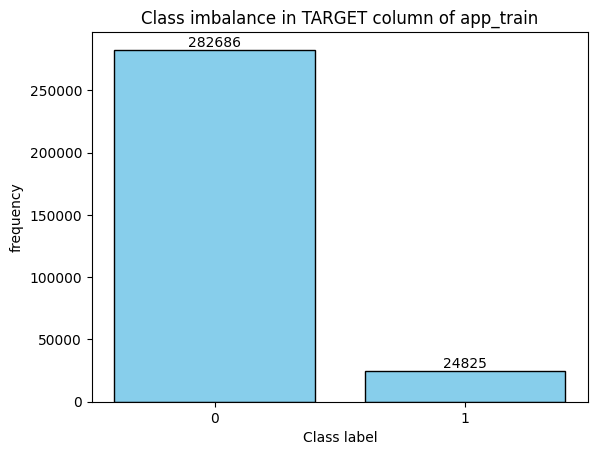

In [82]:
#5a
# histograms

target_col = app_train['TARGET']

# unique class labels and their frequencies
class_labels, class_counts = np.unique(target_col, return_counts=True)

# histogram
plt.bar(class_labels, class_counts, color='skyblue', edgecolor='k')
plt.xticks(class_labels, ['0', '1'])

plt.xlabel('Class label')
plt.ylabel('frequency')
plt.title('Class imbalance in TARGET column of app_train')

for i, count in enumerate(class_counts):
    plt.text(class_labels[i], count, str(count), ha='center', va='bottom')

plt.show()

**5**: Describe briefly your observation (double click to edit a text cell)

In [83]:
# copy your current dataframe with its .copy() method. You should always use the copy() method if you want to keep the original dataframe untouched when you modify
# this is a very common bug, so please read  https://www.statology.org/pandas-copy-dataframe/

## Your code here
app_train_original = app_train.copy()


# 6a
# fix imbalance with undersampling or oversampling
# Implement undersampling or oversampling *without* external libraries, only the library provided to implement yourself the chosen solution.


# If we want to perform under-sampling to address class imbalance,
# then we'll use the RandomUnderSampler from the imbalanced-learn library !

from imblearn.under_sampling import RandomUnderSampler

X = app_train.drop(columns=['TARGET'])
y = app_train['TARGET']

under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

X_Resampled, y_Resampled = under_sampler.fit_resample(X, y)
# balanced dataset in X_resampled and y_resampled.

In [84]:
# 6b
# fix balance with SMOTE on your previously copied dataframe
# You can use any external libraries to use SMOTE. We recommend the imbalanced-learn package https://imbalanced-learn.org/stable/over_sampling.html
# Make sure to select the appropriate SMOTE variant.

## Your code here

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

app_train_smote = app_train.copy()

categorical_cols = app_train_smote.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    app_train_smote[col] = label_encoder.fit_transform(app_train_smote[col])

numeric_cols = app_train_smote.select_dtypes(include=['number']).columns

imputer = SimpleImputer(strategy='mean')
app_train_smote[numeric_cols] = imputer.fit_transform(app_train_smote[numeric_cols])

smote = SMOTE(random_state=42)

X = app_train_smote.drop(columns=['TARGET'])
y = app_train_smote['TARGET']

X_resampled, y_resampled = smote.fit_resample(X, y)

class_dis_resampled = pd.Series(y_resampled).value_counts()
print("Class distribution after SMOTE (they are the same size now):\n", class_dis_resampled)


Class distribution after SMOTE (they are the same size now):
 1.0    282686
0.0    282686
Name: TARGET, dtype: int64


<h2>Categorical features (9pts)</h2>

In app_test

**7a**: How will you transform the column NAME_HOUSING_TYPE in app_test be correctly handled by the model? How will you transform CODE_GENDER column?

**7b**: How would you transform the column NAME_HOUSING_TYPE in app_test if you want only 3 categories? Use LabelEncoder to transform FLAG_OWN_CAR column.

**7c**: In ORGANIZATION_TYPE, only keep the categories that appear in more than 10% of the dataset. Group other categories in one. What is the size of the dummy vector for ORGANIZATION_TYPE after this transformation?


8: **In app_test, app_past and bureau,** transform all the categorical columns that you have not processed in 7 using One-hot encoding.

*You will be evaluated as follow*
* 7: Description of the approach 4pts. Code 3pts.
* 8: Correct approach + code 2pts.

In [85]:
# Assuming 'df' is your DataFrame
# Replace 'column_name' with the actual column name you want to check
column_name = 'NAME_HOUSING_TYPE'

# Check if the specified column has NaN values
if app_test[column_name].isna().any():
    print(f"Column '{column_name}' has NaN values.")
else:
    print(f"Column '{column_name}' does not have NaN values.", '\n')
app_test.NAME_HOUSING_TYPE

Column 'NAME_HOUSING_TYPE' does not have NaN values. 



0        House / apartment
1        House / apartment
2        House / apartment
3        House / apartment
4        House / apartment
               ...        
48739    House / apartment
48740    House / apartment
48741    House / apartment
48742    House / apartment
48743    House / apartment
Name: NAME_HOUSING_TYPE, Length: 48744, dtype: object

In [86]:
# 7a

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

app_test_encoded = pd.get_dummies(app_test, columns=['NAME_HOUSING_TYPE'], prefix='Housing_Type')  # one-hot encoding categorical features.
app_test['CODE_GENDER'] = label_encoder.fit_transform(app_test['CODE_GENDER'])                     # to assign a unique integer to each category in this column.

In [87]:
# 7b

category_mapping = {
    "House / apartment": "Catgry1",
    "Rented apartment": "Catgry2",
    "With parents": "Catgry3",}

# mapping to the column
app_test["NAME_HOUSING_TYPE"] = app_test["NAME_HOUSING_TYPE"].map(category_mapping)

housing_type_column = app_test['NAME_HOUSING_TYPE']

print(housing_type_column.head(30))
print(housing_type_column.unique())

#  >>>>>>>>>>>>  'NAME_HOUSING_TYPE' column has 2147 missing values.
# impute missing values with the mode (most frequent category).

mode = app_test["NAME_HOUSING_TYPE"].mode()[0]
app_test["NAME_HOUSING_TYPE"].fillna(mode, inplace=True)



label_encoder = LabelEncoder()
app_test["FLAG_OWN_CAR_encoded"] = label_encoder.fit_transform(app_test["FLAG_OWN_CAR"])


0     Catgry1
1     Catgry1
2     Catgry1
3     Catgry1
4     Catgry1
5     Catgry1
6     Catgry1
7     Catgry3
8     Catgry1
9     Catgry1
10    Catgry1
11    Catgry1
12    Catgry1
13    Catgry1
14    Catgry1
15    Catgry1
16    Catgry1
17    Catgry1
18    Catgry3
19    Catgry1
20    Catgry1
21    Catgry1
22    Catgry1
23    Catgry1
24    Catgry1
25    Catgry1
26    Catgry1
27    Catgry1
28    Catgry1
29    Catgry1
Name: NAME_HOUSING_TYPE, dtype: object
['Catgry1' 'Catgry3' 'Catgry2' nan]


In [88]:
#7c
# to retain common categories with significant presence in the dataset.

# frequency of each category
category_counts = app_test['ORGANIZATION_TYPE'].value_counts(normalize=True)

common_categories = category_counts[category_counts > 0.10].index    # categories that appear more than 10%

# less common categories goes to 'Other' category
app_test['ORGANIZATION_TYPE'] = app_test['ORGANIZATION_TYPE'].apply(lambda x: x if x in common_categories else 'Other')

# 'ORGANIZATION_TYPE' column into one-hot encoded
dff = pd.get_dummies(app_test, columns=['ORGANIZATION_TYPE'], prefix='ORG')

d_vector_size = len(dff.columns) - 1  # Exclude the 'TARGET' column
print("Size of the dummy vector for ORGANIZATION_TYPE:", d_vector_size)

Size of the dummy vector for ORGANIZATION_TYPE: 96


In [89]:
#8

# Apply one-hot encoding  to  app_past and bureau datasets.
app_past_encoded = pd.get_dummies(app_past, columns=app_past.select_dtypes(include=['object']).columns)
bureau_encoded = pd.get_dummies(bureau, columns=bureau.select_dtypes(include=['object']).columns)

<h2>Anomalies (7 pts)</h2>

**In app_test**

**9a**: Is there an anomaly with the column DEF_30_CNT_SOCIAL_CIRCLE? If so, how would you solve it?

**9b**: Is there an anomaly with the column LANDAREA_AVG? If so, how would you solve it?

**9c**: Is there an anomaly with the column AMT_INCOME_TOTAL? If so, how would you solve it?

10: Fix the anomaly in DAYS_EMPLOYED?

*You will be evaluated as follow*
* 9: Description of the approach + code 5pts.
* 10: code 2pts

In [90]:
#9a

col_name = "DEF_30_CNT_SOCIAL_CIRCLE"
value_counts = app_test[col_name].value_counts()  # count of unique values in a specific column

print(value_counts, '\n')

# total count in the column. (this time app_test does not have NaN !)
tot_count = app_test[col_name].count()

print(tot_count)

# percentage of each distinct value
for value, count in value_counts.items():
    percentage = (count / tot_count) * 100
    print(f"{value}: {percentage:.2f}%")

0.0     43224
1.0      4443
2.0       834
3.0       189
4.0        40
5.0         8
6.0         3
34.0        3
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64 

48744
0.0: 88.68%
1.0: 9.11%
2.0: 1.71%
3.0: 0.39%
4.0: 0.08%
5.0: 0.02%
6.0: 0.01%
34.0: 0.01%


**how to **: outliers are the values that are far from the dense population. categories with very lower or very higher frequency than the other categories can be considered as outliers in the categorical data. there can be various reasons for being outliers in the categorical data such as fault collection of the data or categories can be rare and hard to collect data about it.  In this case, we can use a classification model to deal with anomaly. Based on some domain knowledge , we may also exclude this anomaly (here 34.0).

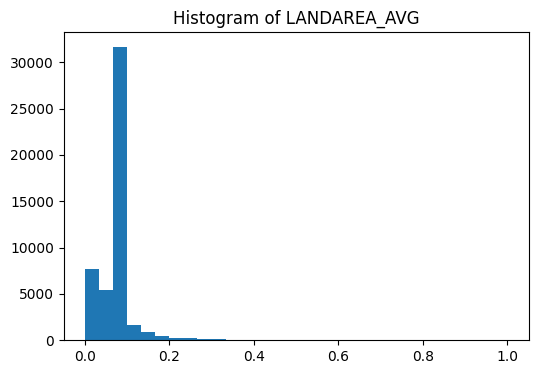

0.067192    28254
0.000000     3306
0.014100       37
0.011400       33
0.015800       33
            ...  
0.145200        2
0.137700        2
0.248500        2
0.164200        2
0.164600        2
Name: LANDAREA_AVG, Length: 1891, dtype: int64


In [91]:
#9b

# Step 3: Histogram

plt.figure(figsize=(6, 4))
plt.hist(app_test['LANDAREA_AVG'], bins=30)
plt.title("Histogram of LANDAREA_AVG")
plt.show()

# this column has a lot of classes and a lot of them has only
# "one" member. these can be regarded as outliers. We can group spare classes into a new calss "0.0" (can be something else).
# Note that, we have already a class 0.0 and now the members of this class will increase.

threshold = 1  # classes with only one member will be grouped

class_counts = app_test['LANDAREA_AVG'].value_counts()

# detect sparse classes (those with counts less than or equal to the threshold)
sparse_classes = class_counts[class_counts <= threshold].index

# Replace the sparse classes with '0.0'
app_test['LANDAREA_AVG'] = app_test['LANDAREA_AVG'].apply(lambda x: 0.0 if x in sparse_classes else x) # choose of 0.0 or something else, needs domain knowledge.

updated_class_counts = app_test['LANDAREA_AVG'].value_counts()
print(updated_class_counts)

In [94]:
# Find the class with the highest value and its count
class_counts = app_test['LANDAREA_AVG'].value_counts()
highest_class = class_counts.idxmax()
count_highest_class = class_counts.max()

print("Class with the highest value:", highest_class)
print("Number of members in this class:", count_highest_class)


Class with the highest value: 0.06719209370424596
Number of members in this class: 28254


In [ ]:
# 9c

col_name = "AMT_INCOME_TOTAL"

val_counts = app_test[col_name].value_counts()
total_count = app_test[col_name].count()

# percentage of each distinct value
for value, count in val_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {percentage:.2f}%")

135000.0: 11.41%
112500.0: 9.95%
157500.0: 9.10%
180000.0: 8.63%
225000.0: 7.72%
202500.0: 6.27%
90000.0: 6.04%
270000.0: 3.96%
67500.0: 2.81%
315000.0: 2.23%
247500.0: 1.93%
360000.0: 1.66%
81000.0: 1.51%
126000.0: 1.41%
292500.0: 1.36%
121500.0: 1.25%
144000.0: 1.07%
99000.0: 1.02%
171000.0: 0.93%
103500.0: 0.91%
450000.0: 0.86%
76500.0: 0.74%
405000.0: 0.73%
166500.0: 0.73%
337500.0: 0.71%
117000.0: 0.63%
162000.0: 0.62%
189000.0: 0.53%
54000.0: 0.53%
148500.0: 0.53%
108000.0: 0.52%
94500.0: 0.49%
216000.0: 0.46%
72000.0: 0.45%
45000.0: 0.43%
130500.0: 0.43%
85500.0: 0.41%
382500.0: 0.37%
540000.0: 0.33%
153000.0: 0.32%
193500.0: 0.32%
211500.0: 0.31%
58500.0: 0.30%
234000.0: 0.28%
207000.0: 0.27%
175500.0: 0.27%
139500.0: 0.27%
63000.0: 0.23%
675000.0: 0.22%
427500.0: 0.22%
252000.0: 0.20%
261000.0: 0.19%
256500.0: 0.15%
243000.0: 0.14%
49500.0: 0.14%
238500.0: 0.14%
306000.0: 0.14%
198000.0: 0.14%
184500.0: 0.14%
220500.0: 0.14%
495000.0: 0.13%
279000.0: 0.10%
351000.0: 0.08%
2295

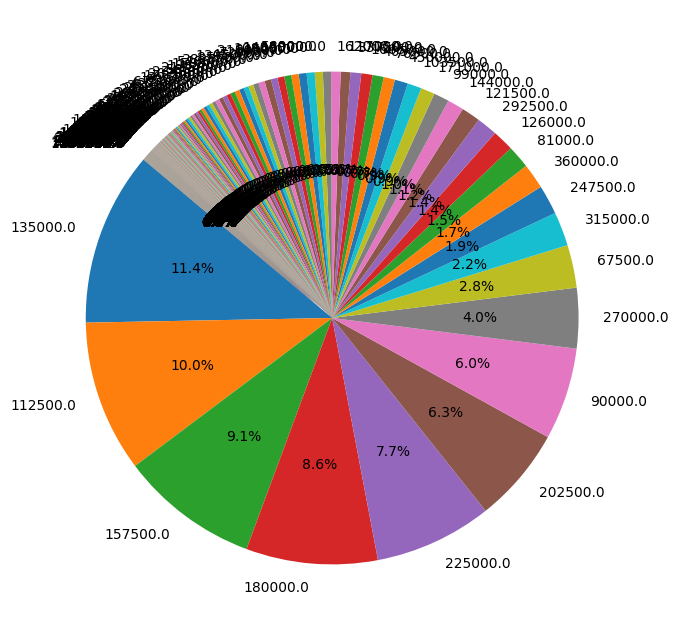

In [ ]:
col_name = "AMT_INCOME_TOTAL"

# count for each label in this column.
label_counts = app_test[col_name].value_counts()

# pie chart plot.
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.show()


From the given pie chart, we can see that there are a lot of unique values in the column with very little percentage. these are anomaly (at first sight).  we can use statistical tests such as z-scores, IQR (Interquartile Range), or other relevant statistical methods to identify outliers based on their deviation from the mean of distribution. If we set IQR = Q3 — Q1. The data points which fall below Q1-1.5 IQR or above Q3 + 1.5 IQR are outliers. should note that, while  anomalies can be considered outliers, not all outliers are necessarily anomalies.

In [ ]:
# 10

col_name = "DAYS_EMPLOYED"

value_counts = app_test[col_name].value_counts()     # count for each distinct value in thsi column
total_count = app_test[col_name].count()             # total count of values

# percentage of each distinct value
for value, count in value_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {percentage:.2f}%")

Streaming output truncated to the last 5000 lines.
-4001: 0.01%
-3620: 0.01%
-1825: 0.01%
-2614: 0.01%
-3878: 0.01%
-4405: 0.01%
-2047: 0.01%
-3521: 0.01%
-4679: 0.01%
-2429: 0.01%
-3380: 0.01%
-5627: 0.01%
-4970: 0.01%
-4270: 0.01%
-3363: 0.01%
-5490: 0.01%
-3887: 0.01%
-1836: 0.01%
-4439: 0.01%
-2410: 0.01%
-3888: 0.01%
-2953: 0.01%
-4920: 0.01%
-1806: 0.01%
-3021: 0.01%
-1560: 0.01%
-5639: 0.01%
-5171: 0.01%
-3005: 0.01%
-5274: 0.01%
-1898: 0.01%
-4440: 0.01%
-2430: 0.01%
-3405: 0.01%
-3799: 0.01%
-3203: 0.01%
-1514: 0.01%
-4166: 0.01%
-2130: 0.01%
-3793: 0.01%
-2061: 0.01%
-4298: 0.01%
-3555: 0.01%
-3736: 0.01%
-2156: 0.01%
-2320: 0.01%
-3222: 0.01%
-1667: 0.01%
-4803: 0.01%
-3149: 0.01%
-2798: 0.01%
-4552: 0.01%
-3296: 0.01%
-3781: 0.01%
-2628: 0.01%
-1408: 0.01%
-5595: 0.01%
-119: 0.01%
-2301: 0.01%
-2425: 0.01%
-2078: 0.01%
-3057: 0.01%
-2726: 0.01%
-3533: 0.01%
-3056: 0.01%
-3832: 0.01%
-2272: 0.01%
-2399: 0.01%
-1631: 0.01%
-3208: 0.01%
-2899: 0.01%
-2307: 0.01%
-4459: 0.01%
-

In [ ]:

threshold = 1  # classes with only one member will be grouped to 0.0 class.

# count of each class
class_counts = app_test['DAYS_EMPLOYED'].value_counts()
sparse_classes = class_counts[class_counts <= threshold].index

app_test['DAYS_EMPLOYED'] = app_test['DAYS_EMPLOYED'].apply(lambda x: 0.0 if x in sparse_classes else x) # to replace sparse classes with 0

updated_class_counts = app_test['DAYS_EMPLOYED'].value_counts()
print(updated_class_counts)


 365243.0    9274
 0.0         2400
-1119.0        32
-389.0         31
-1240.0        30
             ... 
-6036.0         2
-5416.0         2
-9450.0         2
-26.0           2
-7348.0         2
Name: DAYS_EMPLOYED, Length: 5464, dtype: int64


<h2>Correlations (9 pts)</h2>


11: **In app_test**, remove the collinear features of the dataset. How did you choose the threshold?

12: What features from bureau.csv could you use to improve the training set? Use the random forest model from the notebook of the Lecture to check if it actually improves the final model performance.

*You will be evaluated as follow*
* 11: Code 3pts. Threshold explanation 1pt.
* 12: Description of the approach 1pt. Code implementation of the approach 2pts. Improved performance 2pts.

**If two features are collinear, they shouldn’t be considered together and only the most informative features should be considered.**

Basically, we want to choose feature variables that are not correlated with each other for modelling.  And also, the presence of the correlated features may not add any new valuable information to the model. app_test doesn't have TARGET feature, so this code iterates via a list of thresholds and evaluates the impact of each one on data based on a predefined evaluation metric (here compute_evaluation_metric function).

In [ ]:
# threshold selection for app_test with no Target column.

data = app_test.copy()
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  # a list of thresholds.

# Initialize variables to store results
best_threshold = None
best_evaluation_metric = 0  # Replace with your specific evaluation metric

def compute_evaluation_metric(xyz):
    corr_matrix = xyz.corr().abs()       # to calculate sum of absolute correlations in the dataset
    sum_absolute_cor = corr_matrix.values.sum() - xyz.shape[1]  # Subtract the number of features

    return sum_absolute_cor

for t in thresholds:
    corr_matrix = data.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    to_drop = [column for column in upper.columns if any(upper[column] > t)]     # features with correlation above the threshold
    reduced_data = data.drop(data[to_drop], axis=1)                                      # to drop collinear features
    evaluation_metric = compute_evaluation_metric(reduced_data)  # Replace with your own evaluation function

    # to update the best threshold if a higher evaluation metric is achieved
    if evaluation_metric > best_evaluation_metric:
        best_evaluation_metric = evaluation_metric
        best_threshold = t

print("Best Threshold:", best_threshold)

<ipython-input-63-edebbc1b727c>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr().abs()
<ipython-input-63-edebbc1b727c>:18: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
<ipython-input-63-edebbc1b727c>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric

Best Threshold: 0.9


In [ ]:
t = 0.9  # Threshold , from previous section

corr_matrix = app_test.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > t)]

app_test = app_test.drop(app_test[to_drop], axis=1)

<ipython-input-64-b380d4431d40>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = app_test.corr().abs()
<ipython-input-64-b380d4431d40>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [ ]:
cols_with_nan = app_train.columns[app_train.isna().any()].tolist()

for i, j in enumerate(cols_with_nan):
    print(i, ' ', j, '\n')

# print columns with NaN in app_train.
# for model we need to fill them out, first.

0   AMT_ANNUITY 

1   AMT_GOODS_PRICE 

2   NAME_TYPE_SUITE 

3   OWN_CAR_AGE 

4   OCCUPATION_TYPE 

5   CNT_FAM_MEMBERS 

6   EXT_SOURCE_1 

7   EXT_SOURCE_2 

8   EXT_SOURCE_3 

9   APARTMENTS_AVG 

10   BASEMENTAREA_AVG 

11   YEARS_BEGINEXPLUATATION_AVG 

12   YEARS_BUILD_AVG 

13   COMMONAREA_AVG 

14   ELEVATORS_AVG 

15   ENTRANCES_AVG 

16   FLOORSMAX_AVG 

17   FLOORSMIN_AVG 

18   LANDAREA_AVG 

19   LIVINGAPARTMENTS_AVG 

20   LIVINGAREA_AVG 

21   NONLIVINGAPARTMENTS_AVG 

22   NONLIVINGAREA_AVG 

23   APARTMENTS_MODE 

24   BASEMENTAREA_MODE 

25   YEARS_BEGINEXPLUATATION_MODE 

26   YEARS_BUILD_MODE 

27   COMMONAREA_MODE 

28   ELEVATORS_MODE 

29   ENTRANCES_MODE 

30   FLOORSMAX_MODE 

31   FLOORSMIN_MODE 

32   LANDAREA_MODE 

33   LIVINGAPARTMENTS_MODE 

34   LIVINGAREA_MODE 

35   NONLIVINGAPARTMENTS_MODE 

36   NONLIVINGAREA_MODE 

37   APARTMENTS_MEDI 

38   BASEMENTAREA_MEDI 

39   YEARS_BEGINEXPLUATATION_MEDI 

40   YEARS_BUILD_MEDI 

41   COMMONAREA_MEDI 

42 

In [ ]:

# this part detects columns with NaN more than 60 percent and also delets them.

for col_name in cols_with_nan:
    nan_count = app_train[col_name].isna().sum()
    total_rows = app_train.shape[0]
    nan_percentage = (nan_count / total_rows) * 100

    if nan_percentage > 60:
        print(f"The column '{col_name}' has more than 60% NaN values.")
        app_train.drop(col_name, axis=1, inplace=True)

The column 'OWN_CAR_AGE' has more than 60% NaN values.
The column 'YEARS_BUILD_AVG' has more than 60% NaN values.
The column 'COMMONAREA_AVG' has more than 60% NaN values.
The column 'FLOORSMIN_AVG' has more than 60% NaN values.
The column 'LIVINGAPARTMENTS_AVG' has more than 60% NaN values.
The column 'NONLIVINGAPARTMENTS_AVG' has more than 60% NaN values.
The column 'YEARS_BUILD_MODE' has more than 60% NaN values.
The column 'COMMONAREA_MODE' has more than 60% NaN values.
The column 'FLOORSMIN_MODE' has more than 60% NaN values.
The column 'LIVINGAPARTMENTS_MODE' has more than 60% NaN values.
The column 'NONLIVINGAPARTMENTS_MODE' has more than 60% NaN values.
The column 'YEARS_BUILD_MEDI' has more than 60% NaN values.
The column 'COMMONAREA_MEDI' has more than 60% NaN values.
The column 'FLOORSMIN_MEDI' has more than 60% NaN values.
The column 'LIVINGAPARTMENTS_MEDI' has more than 60% NaN values.
The column 'NONLIVINGAPARTMENTS_MEDI' has more than 60% NaN values.
The column 'FONDKAPR

In [ ]:
cols_with_nan_2 = app_train.columns[app_train.isna().any()].tolist()  # new list after removal of NaN columns with more than 60 percent.

for i in range(len(cols_with_nan_2)):
  col = cols_with_nan_2[i]
  string_columns = [col for col in app_train.columns if app_train[col].dtype == 'object']

In [ ]:
for col in string_columns:
    print(f"Column '{col}' contains string or character values.")

Column 'NAME_CONTRACT_TYPE' contains string or character values.
Column 'CODE_GENDER' contains string or character values.
Column 'FLAG_OWN_CAR' contains string or character values.
Column 'FLAG_OWN_REALTY' contains string or character values.
Column 'NAME_TYPE_SUITE' contains string or character values.
Column 'NAME_INCOME_TYPE' contains string or character values.
Column 'NAME_EDUCATION_TYPE' contains string or character values.
Column 'NAME_FAMILY_STATUS' contains string or character values.
Column 'NAME_HOUSING_TYPE' contains string or character values.
Column 'OCCUPATION_TYPE' contains string or character values.
Column 'WEEKDAY_APPR_PROCESS_START' contains string or character values.
Column 'ORGANIZATION_TYPE' contains string or character values.
Column 'HOUSETYPE_MODE' contains string or character values.
Column 'WALLSMATERIAL_MODE' contains string or character values.
Column 'EMERGENCYSTATE_MODE' contains string or character values.


In [ ]:
# replace NaN in columns of type string or character/object with mode.

for col in string_columns:
    mode_value = app_train[col].mode()[0]               # the mode for the column
    app_train[col] = app_train[col].fillna(mode_value)  # replace NaN values with the mode

In [ ]:
float_colsNAN = [x for x in cols_with_nan_2 if x not in string_columns]  # to exclude object columns from the list "columns_with_nan".

for i, j in enumerate(float_colsNAN):
    print(i, ' ', j, '\n')

0   AMT_ANNUITY 

1   AMT_GOODS_PRICE 

2   CNT_FAM_MEMBERS 

3   EXT_SOURCE_1 

4   EXT_SOURCE_2 

5   EXT_SOURCE_3 

6   APARTMENTS_AVG 

7   BASEMENTAREA_AVG 

8   YEARS_BEGINEXPLUATATION_AVG 

9   ELEVATORS_AVG 

10   ENTRANCES_AVG 

11   FLOORSMAX_AVG 

12   LANDAREA_AVG 

13   LIVINGAREA_AVG 

14   NONLIVINGAREA_AVG 

15   APARTMENTS_MODE 

16   BASEMENTAREA_MODE 

17   YEARS_BEGINEXPLUATATION_MODE 

18   ELEVATORS_MODE 

19   ENTRANCES_MODE 

20   FLOORSMAX_MODE 

21   LANDAREA_MODE 

22   LIVINGAREA_MODE 

23   NONLIVINGAREA_MODE 

24   APARTMENTS_MEDI 

25   BASEMENTAREA_MEDI 

26   YEARS_BEGINEXPLUATATION_MEDI 

27   ELEVATORS_MEDI 

28   ENTRANCES_MEDI 

29   FLOORSMAX_MEDI 

30   LANDAREA_MEDI 

31   LIVINGAREA_MEDI 

32   NONLIVINGAREA_MEDI 

33   TOTALAREA_MODE 

34   OBS_30_CNT_SOCIAL_CIRCLE 

35   DEF_30_CNT_SOCIAL_CIRCLE 

36   OBS_60_CNT_SOCIAL_CIRCLE 

37   DEF_60_CNT_SOCIAL_CIRCLE 

38   DAYS_LAST_PHONE_CHANGE 

39   AMT_REQ_CREDIT_BUREAU_HOUR 

40   AMT_REQ_CREDIT_

In [ ]:
cols_semi_binary =  ['CNT_FAM_MEMBERS',  'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

for column_name in cols_semi_binary:
    mode_value = app_train[column_name].mode()[0]  # Calculate the mode for the column
    app_train[column_name].fillna(mode_value, inplace=True)  # Replace NaN values with the mode

just_floats =  [x for x in float_colsNAN if x not in cols_semi_binary]  # to exclude object columns from the list "columns_with_nan".

just_floats  # NaNs can be replaced with mean (average).


for column_name in just_floats:
    mode_value = app_train[column_name].mode()[0]  # Calculate the mode for the column
    app_train[column_name].fillna(mode_value, inplace=True)  # Replace NaN values with the mode




In [ ]:
has_nan = app_train.isna().any().any()   # no NaN anymore.

In [ ]:
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


# Step 1: Identify columns with string or character values
string_columns = app_train.select_dtypes(include=['object']).columns

# Step 2: Perform one-hot encoding on these columns
df_encoded = pd.get_dummies(app_train, columns=string_columns, drop_first=True)

# Now, 'df_encoded' contains the one-hot encoded version of your original DataFrame.

# Step 3: Convert any remaining non-numeric columns to numeric
# If you have any columns that are not string but still need conversion (e.g., categorical variables stored as integers), you can convert them to numeric.
df_encoded = df_encoded.apply(pd.to_numeric, errors='ignore')

# 'df_encoded' is now a DataFrame with all columns in numeric format.

# You can use 'df_encoded' for your modeling or analysis.


#########################################################3


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


rf = RandomForestClassifier()

# Assuming 'app_train' is your DataFrame and 'TARGET' is your target variable
X = df_encoded.drop(columns=['TARGET'])
y = df_encoded['TARGET']

# Convert 'y' to a pandas DataFrame
y = pd.DataFrame(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
rf.fit(X_train, y_train)


<ipython-input-74-453648336fdc>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# Evaluate the model on the testing set
accuracy = rf.score(X_test, y_test)
print(f"Model Accuracy on Test Data: {accuracy}")

Model Accuracy on Test Data: 0.9196299367510528


In [ ]:
# 12

bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


##  Class imbalance and model performances (6 points)


**13**: Evaluate the other technique (SMOTE) to handeling imbalance data left in *6.b*. Does it makes a difference on the final model performance? Can you use the performance on the test set to choose which techniques to use? If not, what would you need to do so?

*You will be evaluated as follow*
* 13: Code 3pts. Explanation 3pts.


In [ ]:
## Your code here

**13**: Answer the question here (double click to edit a text cell)

